## 【問題1】1次関数

In [1]:
import numpy as np
x_ndarray = np.arange(-50, 50.1, 0.1)
y_ndarray = 1/2*x_ndarray + 1
print(x_ndarray)
print(y_ndarray)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


## 【問題2】配列の結合

In [2]:
x_ndarray.shape

(1001,)

In [3]:
y_ndarray.shape

(1001,)

In [4]:
# reshape後にaxis=1で結合

np.concatenate([x_ndarray.reshape(1001, 1), y_ndarray.reshape(1001, 1)], 1)

array([[-50.  , -24.  ],
       [-49.9 , -23.95],
       [-49.8 , -23.9 ],
       ...,
       [ 49.8 ,  25.9 ],
       [ 49.9 ,  25.95],
       [ 50.  ,  26.  ]])

In [5]:
# 結合してreshape後に転置

np.transpose((np.concatenate([x_ndarray,y_ndarray])).reshape(2, 1001))

array([[-50.  , -24.  ],
       [-49.9 , -23.95],
       [-49.8 , -23.9 ],
       ...,
       [ 49.8 ,  25.9 ],
       [ 49.9 ,  25.95],
       [ 50.  ,  26.  ]])

## 【問題3】勾配を求める

In [6]:
# 問題2を変数に代入
join = np.concatenate([x_ndarray.reshape(1001, 1), y_ndarray.reshape(1001, 1)], 1)

# 最初の行と最後の行を削除した配列をスライスして作成
# 2つ作るのは形が同じ配列同士で差を計算するため

join_first = join[1:]
join_last = join[:-1]

difference = join_first - join_last
difference

array([[0.1 , 0.05],
       [0.1 , 0.05],
       [0.1 , 0.05],
       ...,
       [0.1 , 0.05],
       [0.1 , 0.05],
       [0.1 , 0.05]])

In [7]:
difference.shape

(1000, 2)

In [8]:
# 勾配を求める

slope = difference[:,1] / difference[:,0]
slope

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

In [9]:
slope.shape

(1000,)

## 【問題4】グラフを描く

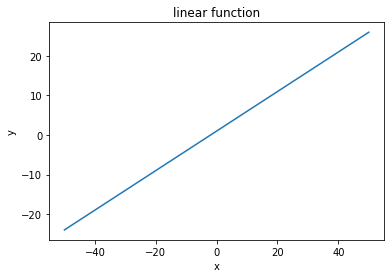

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# １次関数のグラフ

x_plot = x_ndarray
y_plot = y_ndarray

plt.xlabel("x")
plt.ylabel("y")
plt.title("linear function")
plt.plot(x_plot, y_plot)
plt.show()

In [11]:
x_ndarray.shape

(1001,)

In [12]:
slope.shape

(1000,)

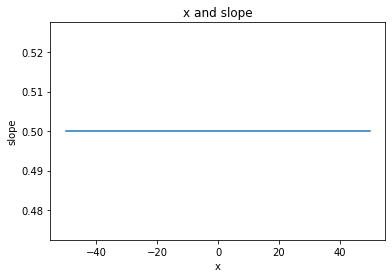

In [13]:
# 横軸をx、縦軸を勾配

x_plot = x_ndarray[0:-1]  #要素数を1000にするためスライス
y_plot = slope  #要素数が1000

plt.xlabel("x")
plt.ylabel("slope")
plt.title("x and slope")
plt.plot(x_plot, y_plot)
plt.show()

## 【問題5】Pythonの関数化

In [14]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    #array_x = np.arange(*x_range)
    array_x = x
    array_y = function
    array_xy = np.concatenate([array_x.reshape(-1, 1), array_y.reshape(-1, 1)], 1)  #最終行を1001で表してたのを-1に修正
    array_xy_first = array_xy[1:]
    array_xy_last = array_xy[:-1]
    difference = array_xy_first - array_xy_last
    gradient = difference[:,1] / difference[:,0]
    return array_xy, gradient

$
・y = x^2　(-50\leqq x\leqq50)
$

In [15]:
def function1(array_x):
    array_y = array_x**2
    return array_y

In [16]:
x = np.arange(-50, 50.1, 0.1)
y = x**2

function1(x)

array([2500.  , 2490.01, 2480.04, ..., 2480.04, 2490.01, 2500.  ])

In [17]:
xy, gradient1 = compute_gradient(function1(x), x)

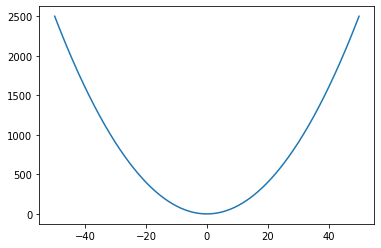

In [18]:
#y=x^2のグラフ
import matplotlib.pyplot as plt  # Matplotlib を読み込む
plt.plot(x, y)  # x, y をプロット
plt.show()  # グラフを表示

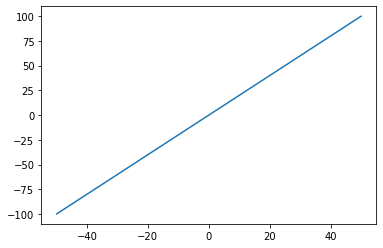

In [19]:
#xと勾配のグラフ
plt.plot(x[1:], gradient1)  # x, y をプロット
plt.show()  # グラフを表示

$
・y=2x^2+2^x　(-50\leqq x\leqq50)
$

In [20]:
def function2(array_x):
    array_y = 2*array_x**2 + 2**array_x
    return array_y

In [21]:
x = np.arange(-50, 50.1, 0.1)
y = 2*x**2 + 2**x

function2(x)

array([5.00000000e+03, 4.98002000e+03, 4.96008000e+03, ...,
       9.80152798e+14, 1.05050176e+15, 1.12589991e+15])

In [22]:
xy, gradient2 = compute_gradient(function2(x), x)

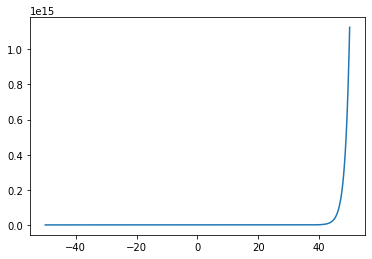

In [23]:
#y=2x^2+2^xのグラフ
plt.plot(x, y)  # x, y をプロット
plt.show()  # グラフを表示

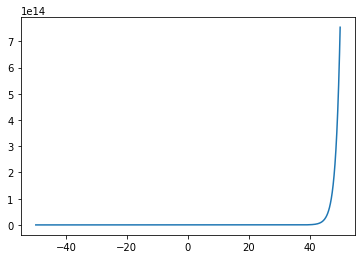

In [24]:
#xと勾配のグラフ
plt.plot(x[1:], gradient2)  # x, y をプロット
plt.show()  # グラフを表示

$
・y = \mathrm{sin}(x^\frac{1}{2}) \quad (0\leqq x\leqq50)
$

In [25]:
def function3(array_x):
    array_y = np.sin(array_x**(1/2))
    return array_y

In [26]:
x = np.arange(0, 50.1, 0.1)
y = np.sin(x**(1/2))

function3(x)

array([ 0.        ,  0.31098359,  0.43245484,  0.5207443 ,  0.59112712,
        0.64963694,  0.69942787,  0.74240966,  0.77985065,  0.8126489 ,
        0.84147098,  0.86682993,  0.88913204,  0.90870674,  0.92582627,
        0.94071933,  0.95358074,  0.9645784 ,  0.97385857,  0.98154978,
        0.98776595,  0.99260871,  0.99616937,  0.99853039,  0.99976666,
        0.99994652,  0.99913255,  0.99738234,  0.99474904,  0.9912819 ,
        0.98702664,  0.98202588,  0.9763194 ,  0.96994446,  0.96293601,
        0.95532692,  0.94714816,  0.93842893,  0.92919686,  0.91947809,
        0.90929743,  0.8986784 ,  0.88764339,  0.87621369,  0.86440961,
        0.85225051,  0.83975487,  0.82694036,  0.81382389,  0.80042165,
        0.78674913,  0.77282122,  0.75865218,  0.74425571,  0.72964498,
        0.71483266,  0.6998309 ,  0.68465144,  0.66930556,  0.65380413,
        0.63815764,  0.62237617,  0.60646949,  0.590447  ,  0.57431777,
        0.55809058,  0.54177389,  0.5253759 ,  0.5089045 ,  0.49

In [27]:
xy, gradient3 = compute_gradient(function3(x), x)

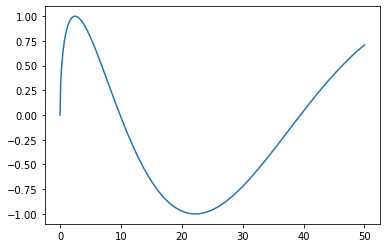

In [28]:
#y=sin(x^(1/2))のグラフ
plt.plot(x, y)  # x, y をプロット
plt.show()  # グラフを表示

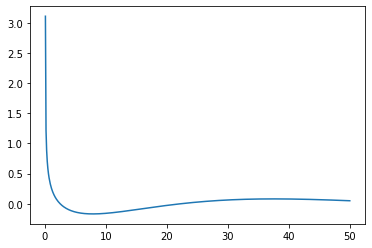

In [29]:
#xと勾配のグラフ
plt.plot(x[1:], gradient3)  # x, y をプロット
plt.show()  # グラフを表示

# 【問題6】最小値を求める
np.arangeで小数を扱うには注意が必要  
参考URL  
https://snowtree-injune.com/2019/07/07/arange-linspace/

$
・y = x^2　(-50\leqq x\leqq50)
$

In [30]:
x = np.arange(-50, 50.1, 0.1)
y = x**2

In [31]:
x.shape

(1001,)

In [32]:
x[1000]  #結果が50ではない

50.00000000000142

In [33]:
x[500]  #結果が0ではない

7.105427357601002e-13

In [34]:
y.min() #結果が0ではない

5.048709793414476e-25

In [35]:
y.argmin()

500

In [36]:
y[500]  #結果が0ではない

5.048709793414476e-25

In [37]:
#最小値
y.min()

5.048709793414476e-25

In [38]:
#最小値のインデックス
y.argmin()

500

In [39]:
#最小のyをとる前の勾配
(y[500] - y[499]) / (x[500] - x[499])

-0.09999999999858034

In [40]:
#最小のyをとる後の勾配
(y[501] - y[500]) / (x[501] - x[500])

0.1000000000014225

$
・y=2x^2+2^x　(-50\leqq x\leqq50)
$

In [41]:
x = np.arange(-50, 50.1, 0.1)
y = 2*x**2 + 2**x

In [42]:
#最小値
y.min()

0.9505505632959851

In [43]:
#最小値のインデックス
y.argmin()

498

In [44]:
#最小のyをとる前の勾配
(y[498] - y[497]) / (x[498] - x[497])

-0.4170183305979998

In [45]:
#最小のyをとる後の勾配
(y[499] - y[498]) / (x[499] - x[498])

0.024824282409972788

$
・y = \mathrm{sin}(x^\frac{1}{2}) \quad (0\leqq x\leqq50)
$

In [46]:
x = np.arange(0, 50.1, 0.1)
y = np.sin(x**(1/2))

In [47]:
#最小値
y.min()

-0.9999997540298113

In [48]:
#最小値のインデックス
y.argmin()

222

In [49]:
#最小のyをとる前の勾配
(y[222] - y[221]) / (x[222] - x[221])

-0.0006388422559544435

In [50]:
#最小のyをとる後の勾配
(y[223] - y[222]) / (x[223] - x[222])

0.0004874477930660974